Importing the required libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# filtring out warning
import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [3]:
#import data 
df1 = pd.read_csv(r'C:\Users\Lenovo\Downloads\leads_basic_details.csv')
df2 = pd.read_csv(r'C:\Users\Lenovo\Downloads\leads_demo_watched_details.csv')
df3 = pd.read_csv(r'C:\Users\Lenovo\Downloads\leads_interaction_details.csv')
df4 = pd.read_csv(r'C:\Users\Lenovo\Downloads\leads_reasons_for_no_interest.csv')
df5 = pd.read_csv(r'C:\Users\Lenovo\Downloads\sales_managers_assigned_leads_details (1).csv')


Data Inspection

In [4]:
##shape of dataset
from numpy import shape
print('*** SHAPE OF DATASETS ***')
print('leads_basic_details: ', df1.shape)
print('leads_demo_watched_details', df2.shape)
print('leads_interaction_details', df3.shape)
print('leads_reasons_for_no_interest', df4.shape)
print('sales_managers_assigned_leads_details', df5.shape)

*** SHAPE OF DATASETS ***
leads_basic_details:  (360, 7)
leads_demo_watched_details (194, 4)
leads_interaction_details (2192, 6)
leads_reasons_for_no_interest (294, 4)
sales_managers_assigned_leads_details (360, 5)


In [5]:
print('***DUBLICATES COUNTS***')
print('leads_basic_details',df1.duplicated().sum())
print('leads_demo_watched_details',df2.duplicated().sum())
print('leads_interaction_details', df3.duplicated().sum())
print('leads_reasons_for_no_interest', df4.duplicated().sum())
print('sales_managers_assigned_leads_details (1)',df5.duplicated().sum())

***DUBLICATES COUNTS***
leads_basic_details 0
leads_demo_watched_details 0
leads_interaction_details 438
leads_reasons_for_no_interest 0
sales_managers_assigned_leads_details (1) 0


In [6]:
#There are duplicate records in leads_interaction_details dataset. 
# We need to drop these records before using the data for analysis.
df3.drop_duplicates(inplace=True)
print('leads_interaction_details: ', df3.duplicated().sum())

leads_interaction_details:  0


In [7]:
print('***Null_value_count***')
print('leads_basic_details',df1.isnull().sum())
print('leads_demo_watched_details',df2.isnull().sum())
print('leads_interaction_details',df3.isnull().sum())
print('leads_reasons_for_no_interest',df4.isnull().sum())
print('sales_managers_assigned_leads_details (1)',df5.isnull().sum())

***Null_value_count***
leads_basic_details lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64
leads_demo_watched_details lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64
leads_interaction_details jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64
leads_reasons_for_no_interest lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64
sales_managers_assigned_leads_details (1) snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64


DATA CLEANING AND HANDLING

Dataframe df1

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [9]:
df1.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


* I observe there is huge gap between the 75% value and the max value. 211 years of age is an unrealistic number and appears to be an outlier. Let us use IQR mathed it and verify 

In [10]:
Q1 = df1.age.quantile(0.25)
Q3 = df1.age.quantile(0.75)
Q1,Q3

(18.0, 24.0)

In [11]:
IQR = Q3 - Q1
IQR

6.0

In [12]:
Lower_Limit = Q1 - 1.5*IQR
Upper_Limit = Q3 + 1.5*IQR
Lower_Limit , Upper_Limit

(9.0, 33.0)

In [13]:
df1_outlier = df1[(df1.age<Lower_Limit)|(df1.age>Upper_Limit)]

In [14]:
# Removing the outliers for df1 dataset
df1 = df1.drop([df1_outlier.index[0] , df1_outlier.index[1]])

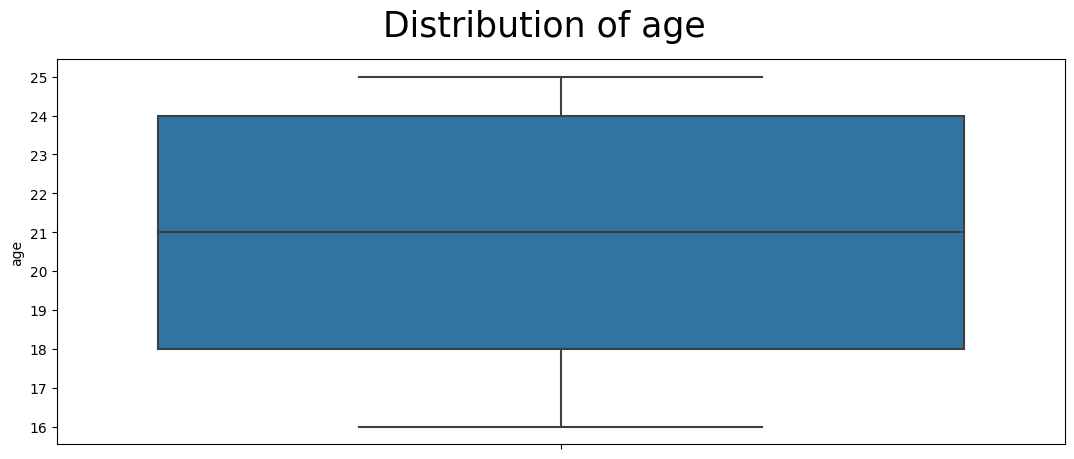

In [15]:
# Re-plotting age distribution after handling the outliers
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of age", fontsize= 25, fontweight = 5, color = 'Black')
ticks = np.arange(0,30,1)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df1.age)
plt.show()

In [16]:
df1.describe()

,age
count,358.000000
mean,20.768156
std,2.852959
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,25.000000


* Yip...outliers are no longer present in df1 data.
* Majority of the students are aged between 18 and 24 years.

In [17]:
df1.gender.value_counts()

FEMALE    198
MALE      160
Name: gender, dtype: int64

In [18]:
df1.columns

Index(['lead_id', 'age', 'gender', 'current_city', 'current_education',
       'parent_occupation', 'lead_gen_source'],
      dtype='object')

In [19]:
df1.current_education.value_counts()

B.Tech                    139
Looking for Job           117
Degree                     42
Intermediate               40
Intermediate Completed     12
10th Completed              8
Name: current_education, dtype: int64

 * 'Intermediate' and 'Intermediate Completed' are inferred the same way.
 * there fore have to rename one of these values to draw more accurate results in our analysis further

In [20]:
df1['current_education'].replace({'Intermediate Completed':'Intermediate'}, inplace= True) 

In [21]:
df1.current_education.value_counts()

B.Tech             139
Looking for Job    117
Intermediate        52
Degree              42
10th Completed       8
Name: current_education, dtype: int64

Dataframe df2

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [23]:
df2.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


In [24]:
min_threshold,max_threshold = df2.watched_percentage.quantile([0.001,0.989])
min_threshold, max_threshold

(2.0, 100.0)

In [25]:
df2[df2.watched_percentage < min_threshold]

,lead_id,demo_watched_date,language,watched_percentage


In [26]:
df2[df2.watched_percentage > max_threshold]

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


In [27]:
df2_outlier = df2[(df2.watched_percentage<min_threshold)|(df2.watched_percentage>max_threshold)]

In [28]:
# Removing the outliers from df2 dataset
df2 = df2.drop([df2_outlier.index[0] , df2_outlier.index[1]])
df2.shape

(192, 4)

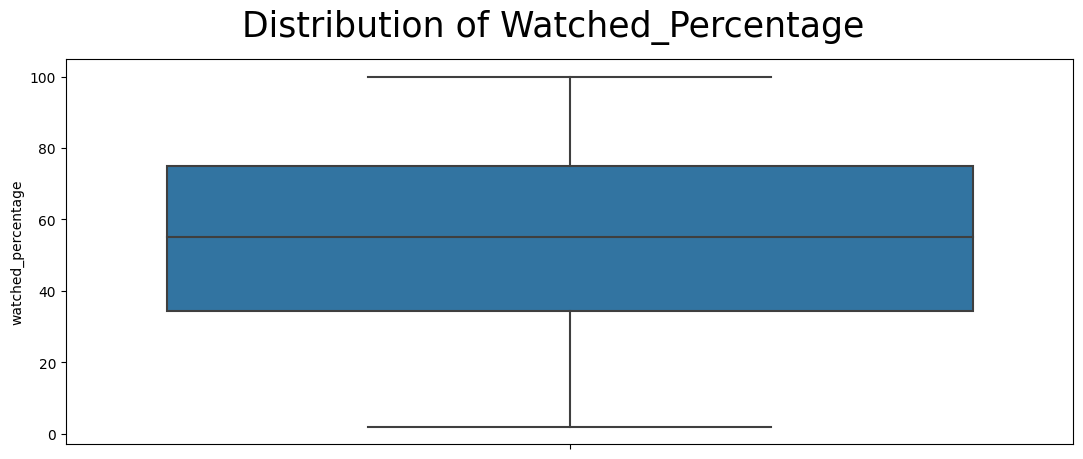

In [29]:
# Plotting watched percentage after handling outliers
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Watched_Percentage", fontsize= 25, fontweight = 5, color = 'Black')
ticks = np.arange(0,200,20)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df2.watched_percentage)

plt.show()

In [30]:
df2.describe()

,watched_percentage
count,192.000000
mean,53.354167
std,25.829477
min,2.000000
25%,34.250000
50%,55.000000
75%,75.000000
max,100.000000


In [31]:
# Removing the outliers identified in df2 from df1
df1 = df1.drop([df2_outlier.index[0], df2_outlier.index[1]])

dataframe df3

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       1754 non-null   object
 1   lead_id         1754 non-null   object
 2   lead_stage      1754 non-null   object
 3   call_done_date  1754 non-null   object
 4   call_status     1754 non-null   object
 5   call_reason     1754 non-null   object
dtypes: object(6)
memory usage: 95.9+ KB


In [33]:
# drop column call_done_date , call_status and call_reason are not necessary for analysis
df3 = df3.drop(['call_done_date','call_status','call_reason'], axis=1)
df3

,jnr_sm_id,lead_id,lead_stage
0,JNR1001MG,USR1001,lead
1,JNR1001MG,USR1001,lead
2,JNR1001MG,USR1002,lead
3,JNR1001MG,USR1002,lead
4,JNR1001MG,USR1002,awareness
...,...,...,...
2187,JNR1001MG,USR1356,lead
2188,JNR1001MG,USR1357,lead
2189,JNR1001MG,USR1358,lead
2190,JNR1001MG,USR1359,lead


In [34]:
#identify dublicate and remove 
print(df3.duplicated().sum())

1023


In [35]:
df3.drop_duplicates(inplace=True)
print(df3.duplicated().sum())

0


In [36]:
# Group and display stages for each lead_id in one record
df3 = df3.groupby(['lead_id'], as_index = False).agg({'lead_stage': '-'.join})

In [37]:
# Renaming the stages according the the last stage each lead was in
df3['lead_stage'].replace({'lead':'lead stage','lead-awareness': 'Awareness Stage',
'lead-awareness-consideration':'Consideration Stage','lead-awareness-consideration-conversion':'Conversion Stage' },
inplace=True)

In [38]:
#Verifying count of leads in each stage
df3.lead_stage.value_counts()

lead stage             164
Awareness Stage         79
Conversion Stage        64
Consideration Stage     51
Name: lead_stage, dtype: int64

DATAFRAME DF4

In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


* Observe that the leads_reasons_for_no_interest dataset has null values in its columns.
* Up on observation, we notice that these coumns in the dataset are all speaking of the reason why the lead did not show interest at any given stage.
* In this scenario, it is advisable to combine the values of these three columns into a single column named 'reason_for_not_interested' and carry out further analysis.

In [40]:
# Replacing Null values with an empty string
df4['reasons_for_not_interested_in_demo'] = df4['reasons_for_not_interested_in_demo'].fillna('')
df4['reasons_for_not_interested_to_consider'] = df4['reasons_for_not_interested_to_consider'].fillna('')
df4['reasons_for_not_interested_to_convert'] = df4['reasons_for_not_interested_to_convert'].fillna('')

In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      294 non-null    object
 2   reasons_for_not_interested_to_consider  294 non-null    object
 3   reasons_for_not_interested_to_convert   294 non-null    object
dtypes: object(4)
memory usage: 9.3+ KB


In [42]:
# Combine all the values in the existing columns and store them in the new column.
df4['Reason_for_not_interested'] = df4['reasons_for_not_interested_in_demo'] + df4['reasons_for_not_interested_to_consider'] + df4['reasons_for_not_interested_to_convert']

In [43]:
# Drop the redundant columns that are no longer required for analysis
df4 = df4.drop(['reasons_for_not_interested_in_demo','reasons_for_not_interested_to_consider', 'reasons_for_not_interested_to_convert'], axis=1)

In [44]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    294 non-null    object
 1   Reason_for_not_interested  294 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [45]:
df4.Reason_for_not_interested.value_counts()

Can't afford                        95
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Cannot afford                        4
Name: Reason_for_not_interested, dtype: int64

We notice that there are two values in 'Reason_for_not_interested' column that mean the same.
One is 'Can't afford' and another is 'Cannot afford'
We shall rename one of these values for more accurate results.

In [46]:
df4['Reason_for_not_interested'].replace({"Can't afford":'Cannot afford'}, inplace=True)


In [47]:
df4.Reason_for_not_interested.value_counts()

Cannot afford                       99
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Name: Reason_for_not_interested, dtype: int64

DATAFRAME DF5

In [48]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [49]:
df5 = df5.drop(['assigned_date'], axis=1)

In [50]:
df5.shape

(360, 4)

In [51]:
# Removing the outliers identified in df1 and df2 from df5
df5 = df5.drop([df1_outlier.index[0] , df1_outlier.index[1], df2_outlier.index[0] , df2_outlier.index[1]])

##VISUALIZATION

In [52]:

df1.lead_gen_source.unique()

array(['social_media', 'user_referrals', 'website', 'SEO',
       'email_marketing'], dtype=object)

Text(0.5, 1.0, 'Lead Source')

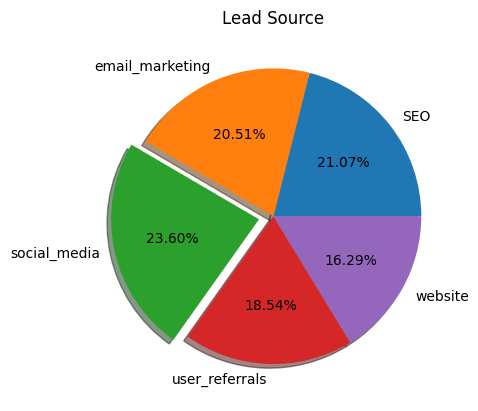

In [53]:
ax = df1.groupby('lead_gen_source').size().plot(kind='pie', autopct='%.2f%%',  y='lead_id', ylabel='', explode = [0,0,0.1,0,0], shadow = "True")
ax.set_title("Lead Source") 

Preliminary observation tells that approx. 24% of the leads came to know about the firm through social media. SEO and email marketing form the next important source, each contributing about 20% of the leads.

In [54]:
df2.language.unique()

array(['Telugu', 'Hindi', 'English'], dtype=object)

Text(0.5, 1.0, 'demo language')

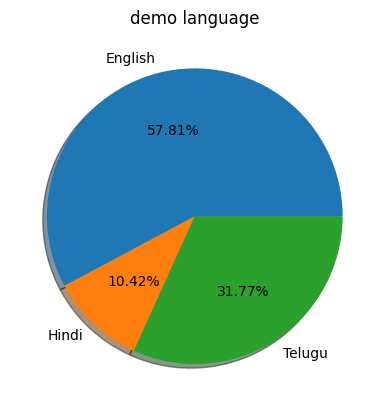

In [55]:
ax = df2.groupby('language').size().plot(kind='pie',autopct= '%.2f%%', y = 'lead_id', ylabel = '', shadow = 'True')
ax.set_title('demo language')

Almost 60% of the leads watched demo in English, 30% in Telugu, and just about 10% in Hindi.

In [56]:
df1.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


Text(0, 0.5, 'lead count')

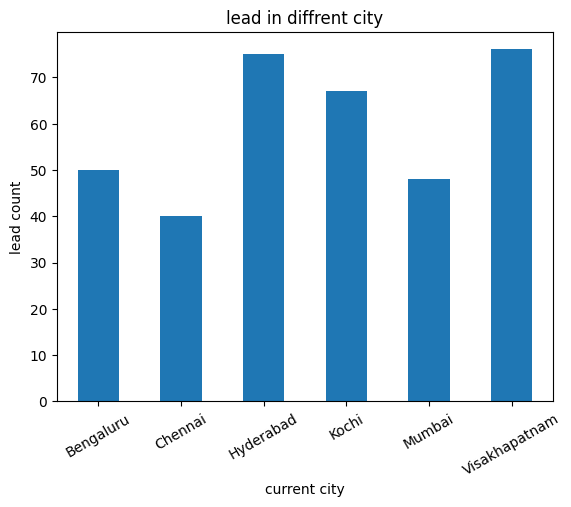

In [57]:
ax = df1.groupby('current_city').size().plot(kind='bar')
plt.title('lead in diffrent city')
plt.xticks(rotation = 30 )
plt.xlabel('current city')
plt.ylabel('lead count')

In [58]:
df2.head()

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


In [59]:
L1= pd.merge(df2,df3)
L1.head()

,lead_id,demo_watched_date,language,watched_percentage,lead_stage
0,USR1002,1/4/2022,Telugu,42,Conversion Stage
1,USR1003,1/7/2022,Telugu,81,Awareness Stage
2,USR1004,1/2/2022,Telugu,35,Awareness Stage
3,USR1005,1/3/2022,Hindi,38,Awareness Stage
4,USR1006,1/12/2022,Hindi,54,Awareness Stage


<AxesSubplot:xlabel='lead_stage', ylabel='watched_percentage'>

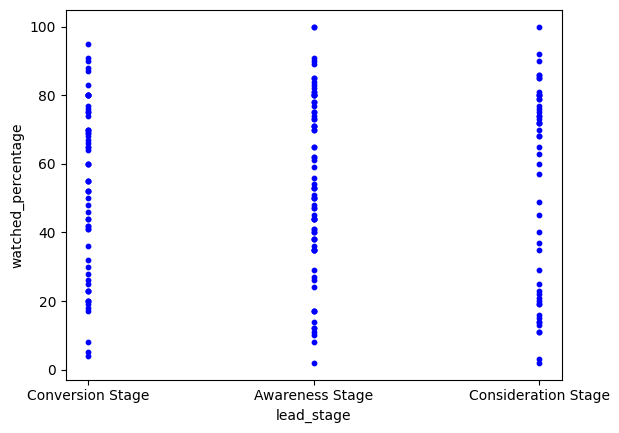

In [60]:
L1.plot.scatter(x = 'lead_stage', y = 'watched_percentage', s=10, c='blue')

Leads having watch percentage in the range of (mean [+/-] std) showed a higher involvement at all stages, more importantly at "consideration" and "conversion" stage.

Text(0.5, 1.0, 'Distribution of Reasons for not interested ')

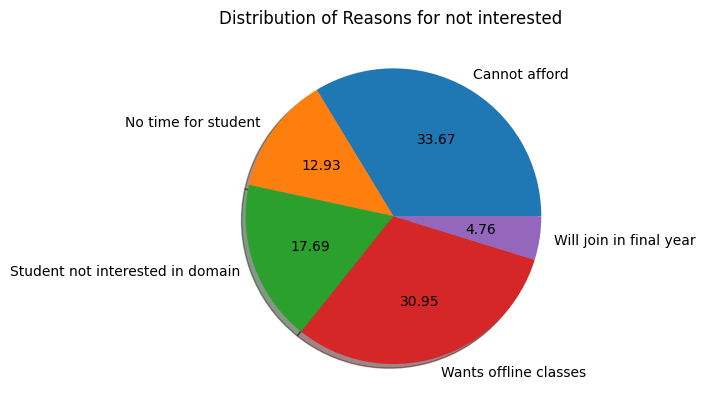

In [63]:
# plot a pie chart
ax = df4.groupby('Reason_for_not_interested').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='' , shadow = 'True')
ax.set_title("Distribution of Reasons for not interested ")

At first glance, the most common reason for leads dropping out at different stages seem to be the affordability of the course. The other crucial reason to look out for is the preference for offline classes.